In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# 1. Harris Corner Detector

## 1.1 Our Implementation for Harris Corner Detector

In [2]:
def harrisCornerDetector(img, windowsize = 5, k = 0.05, thresh = 0.2):
    #Compute Sobel derivative
    dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=windowsize)
    dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=windowsize)
    
    height = img.shape[0]
    width = img.shape[1]
    #Compute Product of derivatives
    Ixx = dx ** 2
    Iyy = dy ** 2
    Ixy = dx * dy
    
    offset = int(windowsize / 2)
    
    RImage = np.zeros(img.shape)
    corners = []
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            windowIxx = Ixx[i - offset:i + offset + 1, j - offset:j + offset + 1]
            windowIyy = Iyy[i - offset:i + offset + 1, j - offset:j + offset + 1]
            windowIxy = Ixy[i - offset:i + offset + 1, j - offset:j + offset + 1]
            
            Sxx = windowIxx.sum()
            Syy = windowIyy.sum()
            Sxy = windowIxy.sum()
        
            det = Sxx * Syy - Sxy * Sxy
            trace = Sxx + Syy
            
            R = det - k * (trace ** 2)
            
            RImage[i, j] = R
    
    #normalize R values
    RImage = RImage / np.max(RImage)
    
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            R = RImage[i, j]
            if R > thresh:
                corners.append((R, j, i))
                
    return corners

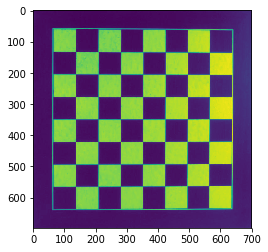

In [3]:
img = cv2.imread('chess_board.jpg', 0)
corners = harrisCornerDetector(img)
plt.imshow(img)

In [4]:
print(len(corners))

2278


True

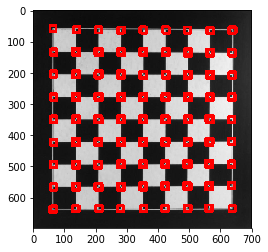

In [5]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# sort corners with highest value first
corners.sort()
corners.reverse()

for i in range(len(corners)):
    R = corners[i][0]
    x = int(corners[i][1])
    y = int(corners[i][2])
    #draw a bounding box around corners
    cv2.rectangle(color_img, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 5)

plt.imshow(color_img)
cv2.imwrite('out.jpg', color_img)

## 1.2 OpenCV's Harris Corner Detector

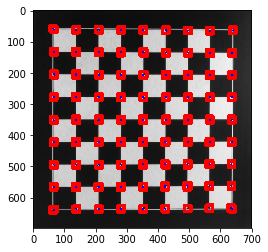

In [6]:
img = cv2.imread('chess_board.jpg', 0)

gray = np.float32(img)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
color_img[dst>0.01*dst.max()]=[0,0,255]

height = img.shape[0]
width = img.shape[1]

for i in range(height):
    for j in range(width):
        if(color_img[i][j][2] == 255):
            x = j
            y = i
            cv2.rectangle(color_img, (x - 10, y - 10), (x + 10, y + 10), (255, 0, 0), 5)
            

plt.imshow(color_img)